In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import shap

plt.style.use('default')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] = 'Times New Roman'
font = {'family': 'serif',
        'weight': "medium"
        }

## 力图

In [10]:
cols = [2, 3, 4, 5, 6, 7]
cols_name = ['semantic similarity', 'fluency', 'toxicity', 'Shannon entropy', 'perplexity','semantic entropy']
df = pd.read_excel("jfleg_data_all.xlsx", usecols=cols)

# 提取 'semantic_similarity' 列
semantic_similarity = df[['semantic similarity']]

# 对其他列进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.drop(columns=['semantic similarity']))
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[:-1])  # 除去 'semantic_similarity' 后的列名

# 将 'semantic_similarity' 列合并回去
df_scaled = pd.concat([semantic_similarity.reset_index(drop=True), df_scaled], axis=1)

# 选择所需列
df = df_scaled[cols_name]
df.head()


,semantic similarity,fluency,toxicity,Shannon entropy,perplexity,semantic entropy
0,0.858357,0.598343,0.016714,0.723976,0.373239,0.665820
1,0.980495,0.342702,0.014098,0.758437,0.506295,0.510259
2,0.877560,0.348808,0.016663,0.858522,0.671426,0.705733
3,0.980103,0.346681,0.016714,0.773507,0.585065,0.539826
4,0.959664,0.346681,0.016714,0.778501,0.480598,0.548796


In [13]:
df.iloc[250]

semantic similarity    0.909796
fluency                0.346681
toxicity               0.022286
Shannon entropy        0.797095
perplexity             0.567776
semantic entropy       0.541842
pred                   0.924015
Name: 250, dtype: float64

In [12]:
# 选择特征
cols = ['fluency', 'toxicity', 'Shannon entropy', 'perplexity','semantic entropy']
# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=150)
model.fit(df[cols], df['semantic similarity'].values)
# 引用package并且获得解释器explainer
explainer = shap.Explainer(model)
# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer(df[cols])
# print(shap_values.shape)
# print(df[cols])
# 可以确认基线值就是训练集的目标变量的拟合值的均值。
y_base = explainer.expected_value
# print(y_base)
df['pred'] = model.predict(df[cols])
# print(data['pred'].mean())

# 绘制 SHAP 力图时保留三位小数
shap_values.values = np.round(shap_values.values, 4)
shap_values.base_values = np.round(shap_values.base_values, 4)
shap_values.data = np.round(shap_values.data, 4)

# 色系一
clist = ["#45978B","#E08648"]
# 色系二
# clist = ['#2166ac', '#d6604d']
# 色系三
# clist = ['#66bd63', '#f46d43']
# force_plot++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
shap.initjs()

# 随机选择 100 个样本的索引
random_indices = np.random.choice(len(shap_values), size=len(shap_values), replace=False)
# 提取对应样本的 SHAP 值并计算平均值
mean_shap_values = shap_values[random_indices].mean(axis=0)

shap.plots.force(shap_values[250], matplotlib=False, show=False, plot_cmap=clist)\
        # .savefig('./force_plot_300dpi.jpg', bbox_inches='tight', dpi=300)

[15:39:35] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


## 热力图

In [3]:
cols = [2, 3, 4, 5, 6, 7]
cols_name = ['semantic similarity', 'Shannon entropy', 'perplexity', 'semantic entropy', 'fluency', 'toxicity']
df = pd.read_excel("jfleg_data_all.xlsx", usecols=cols) 

# 使用 StandardScaler 对数据进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

df = df[cols_name]
df.head(10)

,semantic similarity,Shannon entropy,perplexity,semantic entropy,fluency,toxicity
0,0.488777,0.723976,0.373239,0.665820,0.598343,0.016714
1,0.929601,0.758437,0.506295,0.510259,0.342702,0.014098
2,0.558085,0.858522,0.671426,0.705733,0.348808,0.016663
3,0.928187,0.773507,0.585065,0.539826,0.346681,0.016714
4,0.854418,0.778501,0.480598,0.548796,0.346681,0.016714
5,0.771875,0.751119,0.452591,0.503822,0.346681,0.016685
6,0.831194,0.773836,0.461363,0.591157,0.346681,0.016702
7,0.812892,0.753571,0.453057,0.492442,0.346681,0.016711
8,0.839526,0.771698,0.523920,0.510312,0.346681,0.016709
9,0.872043,0.765739,0.475072,0.547523,0.346681,0.016964


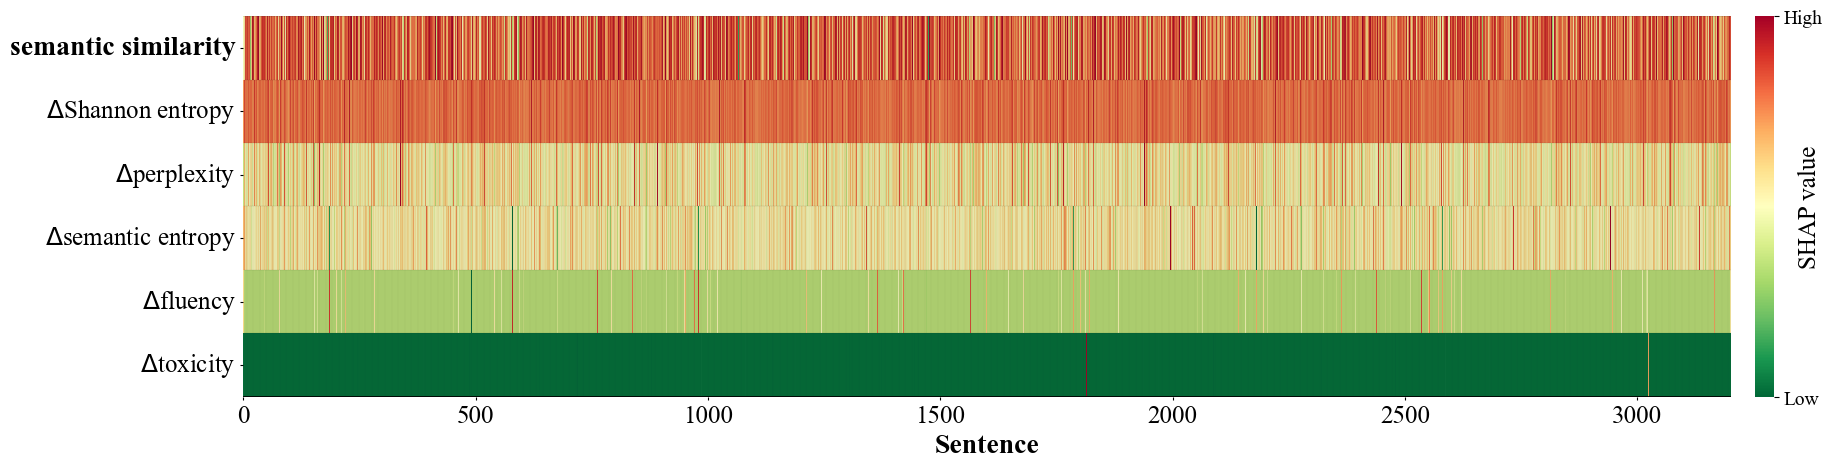

In [ ]:
# 请确保df包含了'ppl'列数据
all_data = df.values.T
# ppl_data = df['fluency'].values.reshape(1, 1601)

## 色系一
clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298","#237f8b","#1D717C"]
## 色系二 RdBu颜色列表
# clist = ['#053061', '#2166ac', '#4393c3', '#92c5de', '#d1e5f0', '#f7f7f7', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']  # RdBu颜色列表
## 色系三
# RdYlGn_r

newcmp = LinearSegmentedColormap.from_list('chaos', clist)

plt.figure(figsize=(24, 8*0.618))
plt.rcParams.update({'font.family': 'Times New Roman'})
ax_heatmap = sns.heatmap(all_data, cmap="RdYlGn_r", linewidths=0, linecolor='gray')

# # 设置色条的位置
cbar = ax_heatmap.collections[0].colorbar
cbar.ax.set_position([0.755, 0.11, 0.02, 0.77])  # 根据需要调整数值以确定位置

vmin = all_data.min()
vmax = all_data.max()

cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['Low', 'High'], size=14)  # 根据需要调整标签
cbar.set_label("SHAP value", labelpad=-18, size=18)

# 设置纵坐标 y轴 刻度标签
yticklabels = df.columns
yticklabels = [r'$\Delta$' + label for label in yticklabels]
yticklabels[0] = df.columns[0]
# yticklabels = [label for label in yticklabels]
ax_heatmap.set_yticklabels(yticklabels, rotation=0, size=18)
# 获取第一个标签的文本对象
label_text = ax_heatmap.get_yticklabels()[0]
# 设置第一个标签的字体样式为粗体
label_text.set_weight('bold')
label_text.set_fontsize(20)

# 设置横坐标 x轴 的刻度位置
ax_heatmap.set_xticks(np.arange(0, all_data.shape[1], 500))
ax_heatmap.set_xticklabels(['0', '500', '1000', '1500', '2000', '2500', '3000'], rotation=0, size=18)

# 绘制横坐标x轴的黑色坐标轴线
ax_heatmap.axhline(y=all_data.shape[0], color='black', linewidth=2)
ax_heatmap.axhline(y=0, color='#363636', linewidth=0.18)

ax_heatmap.set_xlabel('Sentence', size=20, fontdict={'weight': 'bold'})

# 加格子外框
def highlight_cell(x, y, ax=None, **kwargs):
    rect = plt.Rectangle((x, y), 1, 1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect
for i in range(1, all_data.shape[1]):
    for j in range(0, all_data.shape[0]+1):
        highlight_cell(i, j, color="#363636", linewidth=0.03)

# 刻度点
ax_heatmap.tick_params(axis="x", bottom=True, length=2)
ax_heatmap.tick_params(axis="y", left=True, length=2)

# plt.savefig('./plot_1/heatmap_plot_300dpi.jpg', bbox_inches='tight', dpi=300)
# plt.savefig('./fig3_300dpi.png', bbox_inches='tight', dpi=300)
# plt.savefig('./fig3_300dpi.tiff', bbox_inches='tight', dpi=300)
# plt.savefig('./fig3_300dpi.svg', bbox_inches='tight', dpi=300)
plt.show()